<h1>Logistic Regression</h1>

In [1]:
# import required library
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In first part we will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that we want to determine each applicant's chance of admission based on their results on two exams. We have historical data from previous applicants that we can use as a training set for logistic regression. For each training example, we have the applicant's scores on two exams and the admissions decision. Our task is to build a classification model that estimates an applicant's
probability of admission based on the scores from those two exams.

In [2]:
# read data from file
data = np.loadtxt('ex2data1.txt', delimiter=',')
print(data[:10])

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]]


Let's visualize the data.

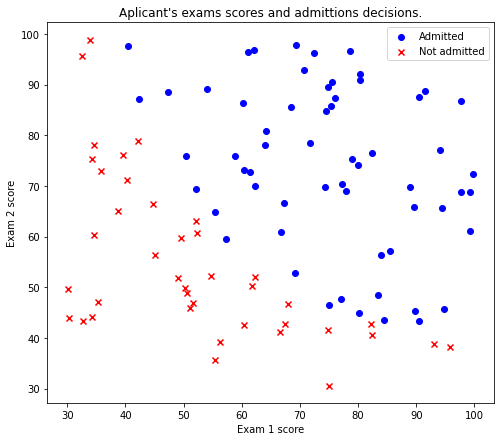

In [3]:
# students with positive admissions
pos = data[data[:,2]==1]

# students with negative admissions
neg = data[data[:,2]==0]

plt.figure(figsize=(8,7))
plt.scatter(pos[:,0], pos[:,1], c='blue', label='Admitted')
plt.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Aplicant\'s exams scores and admittions decisions.')
plt.legend();

The objective of logistic regression is to minimize the cost function:

$J(\theta) = \frac{1}{m}\sum \limits _{i=1}^{m} [-y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))]$

where the hypothesis $h_{\theta}(x)$ is defined as:

$h_{\theta}(x) = g(\theta^{T}x)$, ($x$ is a vector)

where function $g$ is the sigmoid function. The sigmoid function is defined as:

$g(z) = \frac{1}{1 + e^{-z}}$

To minimize the cost function we will use 'minimize' function from 'scipy.optimize' library. To use it we need to write function for computing the cost for given theta which has to be first parameter that is being passed to function and it has to be in form of list containing all elements of theta vector. In the same way we need to write function for computing gradient for given theta. Computed gradient have to be return in form of list. Features (X) and target (y) are being passed to those function as additional arguments.

We will start by creating sigmoid function that will be used to compute cost and gradient:

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Let's plot this function to visually check if it looks like we expect.

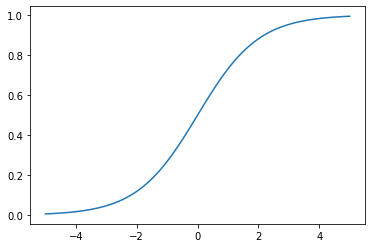

In [5]:
a = np.linspace(-5,5,100)
plt.plot(a,sigmoid(a));

It looks fine.
Now let's create function to compute the cost:

In [6]:
def compute_cost(theta, X, y):
    m,n = X.shape; 
    theta2 = theta.reshape((n,1));
    
    # compute the sigmoid function
    h = sigmoid(X@theta2)
    
    # compute the cost
    J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) # vectorized version of cost function
    return J.item()

Let's prepare variables for features and target. We will need them to test our functions.

In [7]:
# create variable m to keep number of training examples
m = data.shape[0]

# keep profit (target for linear regression task) in y as vector
y = data[:,2].reshape(m,1)

# keep city's population (feature in linear regression) in X as matrix, we will add a columns of ones (intercept)
X = np.column_stack((np.ones((m, 1)), data[:,:2]))

# initialize fitting parameters
theta = np.zeros((3, 1))

Let's test cost function with initial theta and test theta for with we know the approximated cost function values are respectively 0.693 and 0.218.

In [8]:
print('Cost for initial theta:',compute_cost(theta, X, y))
print('Expected value is 0.693.\n')
test_theta = np.array([[-24], [0.2], [0.2]])
print('Cost for test theta:',compute_cost(test_theta, X, y))
print('Expected value is 0.218.')

Cost for initial theta: 0.6931471805599452
Expected value is 0.693.

Cost for test theta: 0.2183301938265977
Expected value is 0.218.


Now let's create function for computing gradient. The gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for j = 0, 1, ..., n) is defined as follows:

$\frac{\delta J(\theta)}{\delta \theta_{j}} = \frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [9]:
def gradient(theta, X, y):
    m,n = X.shape
    theta2 = theta.reshape((n,1))
    grad = 1/m * (X.T @ (sigmoid(X@theta2) - y)) # vectorized version of gradient formula
    return grad.flatten()

Let's test the function.

In [10]:
print('Computed gradient for initial theta', gradient(theta,X,y))
print('Expected gradients (approx): [-0.1000    -12.0092    -11.2628\n')
test_theta = np.array([-24, 0.2, 0.2])
print('Computed gradient for test theta', gradient(test_theta.T,X,y))
print('Expected gradients (approx): [0.043    2.566    2.647]')

Computed gradient for initial theta [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx): [-0.1000    -12.0092    -11.2628

Computed gradient for test theta [0.04290299 2.56623412 2.64679737]
Expected gradients (approx): [0.043    2.566    2.647]


Our gradient function works fine. Now let's process optimization using 'minimize' function from 'scipy.optimize' module to find best theta for our logistic regression model.

In [11]:
res = minimize(compute_cost, theta, args=(X, y), jac=gradient)
opt_theta = np.array(res.x)
opt_theta = opt_theta.reshape((opt_theta.shape[0],1))
print(opt_theta)

[[-25.16133284]
 [  0.2062317 ]
 [  0.2014716 ]]


<ipython-input-6-dc7cc399b3d8>:9: RuntimeWarning: divide by zero encountered in log
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) # vectorized version of cost function
<ipython-input-6-dc7cc399b3d8>:9: RuntimeWarning: invalid value encountered in matmul
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) # vectorized version of cost function


Let's check what is the cost for optimal theta.

In [12]:
print('Cost for optimal theta is ', compute_cost(opt_theta.flatten(), X, y))

Cost for optimal theta is  0.20349770158944375


Now when we have found the optimal theta we can use it to make predictions. If $x^{T}\theta_{optial}$ is grater or equal to zero we would say that it is more probable that applicant will get admitted, other way it is more probable that he/she will not get admitted. $sigmoid(x^{T}\theta_{optial})$ can be treated as apriximation of probability that applicant will get admitted.

We will writte two functions. One to compute probabilty of being admited and second for making predictions (admited / not admited).

In [13]:
# function for estimating probability of admission
def admission_proba(X, theta=opt_theta):
    return sigmoid(X@theta)

In [14]:
# function for prodicting if applicant will get admitted
def predict(X, theta=opt_theta):
    return np.where(X@theta>=0, 1, 0)

We can make predictions on our training set and calculate accuracy of our model.

In [15]:
# predictions
p = predict(X)

# calculating accuracy - how many % of predictions are correct
print('Accuracy on training set is:', 100*np.sum(p==y)/len(y))

Accuracy on training set is: 89.0


Why 89 % of accuracy not 100%? Let's plot decision boundary to get better idea of how our model works.

The decision boundary can be represened by all pairs of $(x_{1}, x_{2})$ for with $x^{T}\theta_{optimal} = 0$

$\theta_{0} + x_{1}\theta_{1}+ x_{2}\theta_{2} = 0 => x_{2} = -1(\theta_{0} + \theta_{1}x_{1})/\theta_{2}$

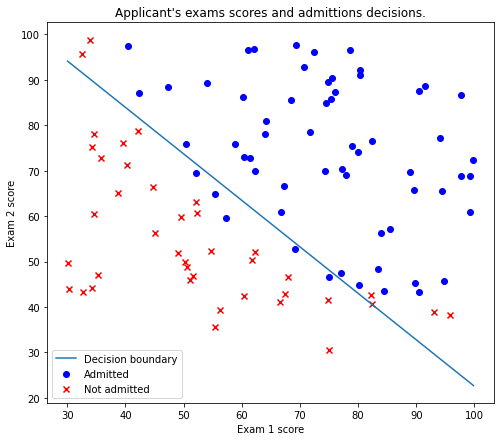

In [16]:
plt.figure(figsize=(8,7))

# first let's plot our data
plt.scatter(pos[:,0], pos[:,1], c='blue', label='Admitted')
plt.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# now let'd plot decision boundary
x1 = [np.min(data[:,0]), np.max(data[:,0])]
x2 = -1*(opt_theta[0] + opt_theta[1]*x1)/opt_theta[2]
plt.plot(x1, x2, label='Decision boundary')
plt.title('Applicant\'s exams scores and admittions decisions.')
plt.legend();

We can see that straight line is to simple to get better classification results. In the next example we will build more compplex solution.

Now let's try make some predictions and get probabilities for new examples.

In [17]:
test_X = np.array([[1,40,40],
                   [1,45,85],
                   [1,85,45],
                   [1,70,50],
                   [1,65,60],
                   [1,100,100]])

predict(test_X)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [18]:
admission_proba(test_X)

array([[1.42903103e-04],
       [7.76290724e-01],
       [8.07614480e-01],
       [3.42643958e-01],
       [5.82251677e-01],
       [9.99999834e-01]])

<h2>Logistic regression with polynomial features.</h2>

In this part we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. We have test results for some microchips on two different tests. From these two tests, we would like to determine whether the microchips should be accepted or rejected. We have a dataset of test results on past microchips, from which we can build a logistic regression model.

Let's get a look at our data.

In [19]:
# read data from file
data = np.loadtxt('ex2data2.txt', delimiter=',')
print(data[:10])

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]
 [-0.39804   0.034357  1.      ]
 [-0.30588  -0.19225   1.      ]
 [ 0.016705 -0.40424   1.      ]
 [ 0.13191  -0.51389   1.      ]]


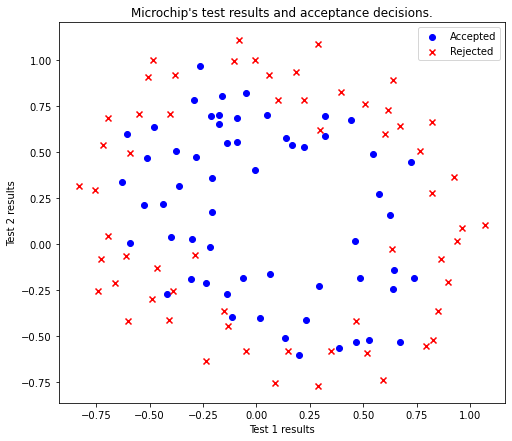

In [20]:
# accepted microchips
pos = data[data[:,2]==1]

# rejected microchips
neg = data[data[:,2]==0]

plt.figure(figsize=(8,7))
plt.scatter(pos[:,0], pos[:,1], c='blue', label='Accepted')
plt.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Rejected')
plt.xlabel('Test 1 results')
plt.ylabel('Test 2 results')
plt.title('Microchip\'s test results and acceptance decisions.')
plt.legend();

It is not possible to separate accepted and rejected examples by straight line. That is why we will generate polynomial features from our two features. This will enable logistic regression to get non-linear decision boundary when ploted on two dimensional plot.

Let's write function for generating polynomial features. We will map the features into all polynomial terms of x1 and x2 up to the sixth power.

In [21]:
def make_polynomial_features(X, degree=6):
    m, n = X.shape
    # we are starting with generating ones for intercept and X passed to the function what relates to degree 1 polynomial
    X_out = np.column_stack((np.ones((m, 1)),X))
    for x1 in range(n):
        for x2 in range(x1+1,n):
            for i in range(2, degree+1):
                for j in range(i+1):
                    X_out = np.column_stack((X_out, (X[:,x1]**(i-j))*(X[:,x2]**(j))))
    return X_out

Lat's generate polynomial features.

In [22]:
X = make_polynomial_features(data[:,:2],6)
m, n = X.shape
print('Number of features is ',n)

Number of features is  28


We have 28 features.

Now we will implement code to compute the cost function and gradient for regularized logistic regression.

The regularized cost function in logistic regression is:

$J(\theta) = \frac{1}{m}\sum \limits _{i=1}^{m} [-y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum \limits_{j=1}^{n}\theta_{j}^{2} $

The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$\frac{\delta J(\theta)}{\delta \theta_{j}} = \frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$, for $j=0$

$\frac{\delta J(\theta)}{\delta \theta_{j}} = \frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j$, for $j\geq1$

In [23]:
# cost function for regularized logistic regression
def compute_cost_reg(theta, X, y, C=0):
    m, n = X.shape;
    
    # make theta vector
    theta2 = theta.reshape((n,1));
    
    # compute the sigmoid function
    h = sigmoid(X@theta2)
    
    # compute the cost - vectorized version
    J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + C/m*theta2[1:].T@theta2[1:]
    return J.item()

# gradien function for regularized logistic regression
def gradient_reg(theta, X, y, C=0):
    m,n = X.shape
    
    # make theta vector
    theta2 = theta.reshape((n,1))
    theta_filter = np.ones((n,1))
    theta_filter[0][0] = 0
    
    # compute gradient - vectorized version
    grad = 1/m * (X.T @ (sigmoid(X@theta2) - y)) + C/m*(theta2*theta_filter)# vectorized version of gradient formula
    return grad.flatten()

Let's generate initial theta, define target and regularization coeffitient and check what is the cost for initil theta.

In [24]:
# generate initial theta
theta = np.zeros(n)

# define target
y = data[:,2].reshape((m,1))

# regularization coefficient
C = 1

# compute cost
J = compute_cost_reg(theta, X, y, C)
print('Cost for initial theta:', J)

Cost for initial theta: 0.6931471805599453


Let's check if function for gradient works fine.

In [25]:
grad = gradient_reg(theta, X, y, C)
print("Gradient for initial theta:",grad)

Gradient for initial theta: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


Let's compute optimal theta.

In [26]:
res = minimize(compute_cost_reg, theta, args=(X, y, C), jac=gradient_reg)
opt_theta = np.array(res.x)
opt_theta = opt_theta.reshape((opt_theta.shape[0],1))
print('Cost for optimal theta:', compute_cost_reg(opt_theta, X, y, C))

Cost for optimal theta: 0.5907859682140189


Let's write predict function and check our model accuracy on training set.

In [27]:
# function for prodicting if microchip will be accepted
def predict(X, theta=opt_theta):
    return np.where(X@theta>=0, 1, 0)

# make predictions for training set
p = predict(X)

# calculating accuracy - how many % of predictions are correct
print('Accuracy on training set is:', 100*np.sum(p==y)/len(y))

Accuracy on training set is: 81.35593220338983


Let's plot decision boundary.

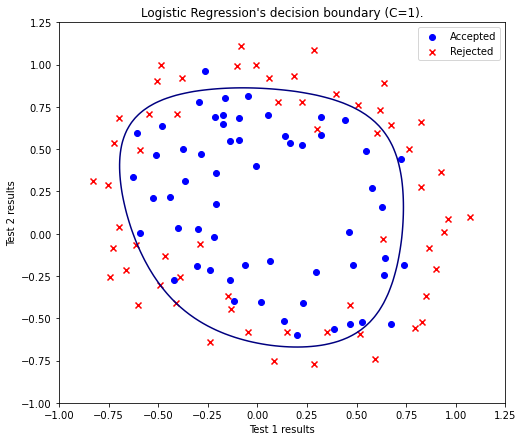

In [28]:
## Visualizing decision boundary
# plot data
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(pos[:,0], pos[:,1], c='blue', label='Accepted')
ax.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Rejected')
ax.set_xlabel('Test 1 results')
ax.set_ylabel('Test 2 results')
ax.set_title('Logistic Regression\'s decision boundary (C=1).')

## Make data for boundary
# Grid over which we will draw decision boundary
x1_vals = np.linspace(-1, 1.25, 100)
x2_vals = np.linspace(-1, 1.25, 100)

# initialize J_vals to a matrix of 0's
boundary = np.zeros((len(x1_vals), len(x2_vals)))

# Fill out boundary
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        x = np.array([[x1_vals[i], x2_vals[j]]])
        boundary[j,i] = make_polynomial_features(x)@opt_theta # boundary[j,i] (not [i,j]) other way we will have to transpose boundary
                                            # to meet countour plot requirments
            
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

ax.contour(x1_mesh, x2_mesh, boundary, levels=np.zeros(1), cmap='jet')

plt.legend();

Let's check how will decision boundary change if we change regularization coefficient.

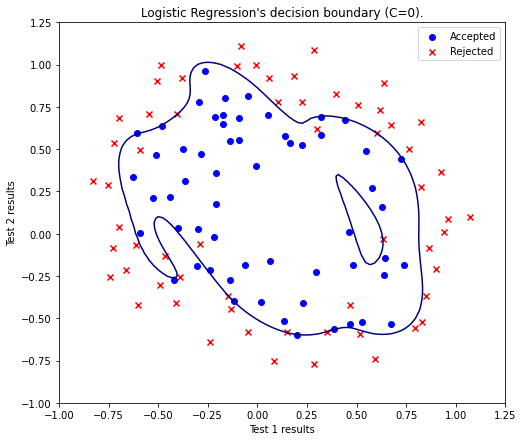

In [29]:
# computing optimum theta for logistic regression without regularization (C=0)
C=0
res = minimize(compute_cost_reg, theta, args=(X, y, C), jac=gradient_reg)
opt_theta = np.array(res.x)
opt_theta = opt_theta.reshape((opt_theta.shape[0],1))

## Visualizing decision boundary
# plot data
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(pos[:,0], pos[:,1], c='blue', label='Accepted')
ax.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Rejected')
ax.set_xlabel('Test 1 results')
ax.set_ylabel('Test 2 results')
ax.set_title('Logistic Regression\'s decision boundary (C=0).')

## Make data for boundary
# Grid over which we will draw decision boundary
x1_vals = np.linspace(-1, 1.25, 100)
x2_vals = np.linspace(-1, 1.25, 100)

# initialize J_vals to a matrix of 0's
boundary = np.zeros((len(x1_vals), len(x2_vals)))

# Fill out boundary
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        x = np.array([[x1_vals[i], x2_vals[j]]])
        boundary[j,i] = make_polynomial_features(x)@opt_theta # boundary[j,i] (not [i,j]) other way we will have to transpose boundary
                                            # to meet countour plot requirments
            
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

ax.contour(x1_mesh, x2_mesh, boundary, levels=np.zeros(1), cmap='jet')

plt.legend();

What we can see is overfitting. It fits best our training data butdo not generelize well. It will perfom pury on new data.

The accuracy on training set sholud be higher then it was for regularized logistic regression.

In [30]:
p = predict(X, opt_theta)

# calculating accuracy - how many % of predictions are correct
print('Accuracy on training set is:', 100*np.sum(p==y)/len(y))

Accuracy on training set is: 91.52542372881356


Let's check what will happen when we increase the regularization coeffitient.

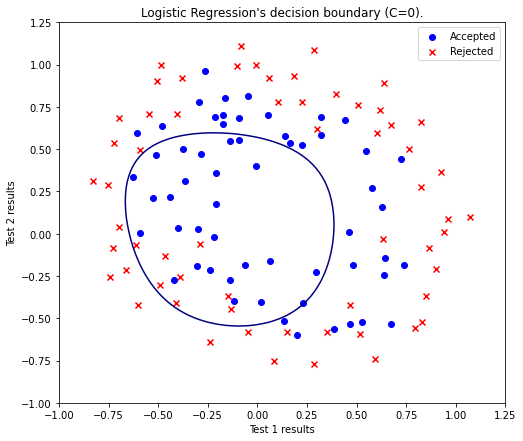

In [31]:
# computing optimum theta for logistic regression with strong regularization
C=10
res = minimize(compute_cost_reg, theta, args=(X, y, C), jac=gradient_reg)
opt_theta = np.array(res.x)
opt_theta = opt_theta.reshape((opt_theta.shape[0],1))

## Visualizing decision boundary
# plot data
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(pos[:,0], pos[:,1], c='blue', label='Accepted')
ax.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Rejected')
ax.set_xlabel('Test 1 results')
ax.set_ylabel('Test 2 results')
ax.set_title('Logistic Regression\'s decision boundary (C=0).')

## Make data for boundary
# Grid over which we will draw decision boundary
x1_vals = np.linspace(-1, 1.25, 100)
x2_vals = np.linspace(-1, 1.25, 100)

# initialize J_vals to a matrix of 0's
boundary = np.zeros((len(x1_vals), len(x2_vals)))

# Fill out boundary
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        x = np.array([[x1_vals[i], x2_vals[j]]])
        boundary[j,i] = make_polynomial_features(x)@opt_theta # boundary[j,i] (not [i,j]) other way we will have to transpose boundary
                                            # to meet countour plot requirments
            
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

ax.contour(x1_mesh, x2_mesh, boundary, levels=np.zeros(1), cmap='jet')

plt.legend();

The constraint from regularization is so strong that logistic regression algorithm couldn't find the right pattern.

<h2>Simple class for Logistic Regression</h2>

Let's write a simple class that wolud enable user to fit logistic regression model and make predictions on new data.

While creating object for our model we can define regularization coefficient (default is 0) and feature polynomial degree (default is 1). While passing the features to the model we don't need to add columns of ones or generate polynomial features. The model does it for us.

In [32]:
# class definition
class MyLogisticRegressionModel():
    def __init__(self, C=0.0, degree=1):
        self.C = C
        self.degree = degree
    
    def make_polynomial_features(self, X):
        m, n = X.shape
        # we are starting with generating ones for intercept and X passed to the function what relates to degree 1 polynomial
        X_out = np.column_stack((np.ones((m, 1)),X))
        for x1 in range(n):
            for x2 in range(x1+1,n):
                for i in range(2, self.degree+1):
                    for j in range(i+1):
                        X_out = np.column_stack((X_out, (X[:,x1]**(i-j))*(X[:,x2]**(j))))
        return X_out
    
    # definition of sigmoid function
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    # cost function for regularized logistic regression
    def compute_cost_reg(self, theta, X, y):
        m, n = X.shape;

        # make theta vector
        theta2 = theta.reshape((n,1));

        # compute the sigmoid function
        h = self.sigmoid(X@theta2)

        # compute the cost - vectorized version
        J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + self.C/m*theta2[1:].T@theta2[1:]
        return J.item()

    # gradient function for regularized logistic regression
    def gradient_reg(self, theta, X, y):
        m,n = X.shape

        # make theta vector
        theta2 = theta.reshape((n,1))
        theta_filter = np.ones((n,1))
        theta_filter[0][0] = 0

        # compute gradient - vectorized version
        grad = 1/m * (X.T @ (sigmoid(X@theta2) - y)) + self.C/m*(theta2*theta_filter)# vectorized version of gradient formula
        return grad.flatten()
    
    # definition for model training function
    def fit(self, X, y):
        X2 = self.make_polynomial_features(X)
        
        # ckeck the number of samples
        m, n = X2.shape
        
        initial_theta = np.zeros(n)
        
        res = minimize(self.compute_cost_reg, initial_theta, args=(X2, y), jac=self.gradient_reg)
        opt_theta = np.array(res.x)
        self.opt_theta = opt_theta.reshape((opt_theta.shape[0],1))
        
        return self
    
    # function for making classifications
    def predict(self, X):
        # make polynomial features
        X2 = self.make_polynomial_features(X)
        
        return np.where(X2@self.opt_theta>=0, 1, 0)
    
    # function for estimating probability that given example belongs to class '1'
    def predict_proba(self, X):
        # make polynomial features
        X2 = self.make_polynomial_features(X)
        
        return self.sigmoid(X2@self.opt_theta)

In [33]:
# create object for logistic regression
clf = MyLogisticRegressionModel(C=1, degree=6)

# prepare feature matrix
X = data[:,:2]

# prepare target vector
y = data[:,2].reshape((len(data[:,2]),1))
                      
# train the model
clf.fit(X, y);

The model is fitted. We can now make predictions. Let's check what is our model accuracy on training set.

In [34]:
p = clf.predict(X)
score = sum(p==y)/len(y)
print('The accuracy on training set is', score)

The accuracy on training set is [0.81355932]


We get the same score as earlier what is not surprise. Let's try our model on the data from first part of this notebook. We can check if using higher polynomial degree can give better results.

In [35]:
# read data from file
data = np.loadtxt('ex2data1.txt', delimiter=',')

# prepare feature matrix
X = data[:,:2]

# prepare target vector
y = data[:,2].reshape((len(data[:,2]),1))

# create classifier object with regularization and with automatic polynomial features generation
clf = MyLogisticRegressionModel(C=1, degree=3)

# fit the model
clf.fit(X, y)

# check model's accuracy
p = clf.predict(X)
score = 100 * np.sum(p==y)/len(y)
print('Accuracy of model with additional polynomial features on training set is', score ,'%')
print('Accuracy without polynomial features was 89 %')

Accuracy of model with additional polynomial features on training set is 100.0 %
Accuracy without polynomial features was 89 %


<ipython-input-32-3b9a375b8303>:33: RuntimeWarning: divide by zero encountered in log
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + self.C/m*theta2[1:].T@theta2[1:]
<ipython-input-32-3b9a375b8303>:33: RuntimeWarning: invalid value encountered in matmul
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + self.C/m*theta2[1:].T@theta2[1:]


Plot decision boundary using predict_proba method of our logistic regression object.

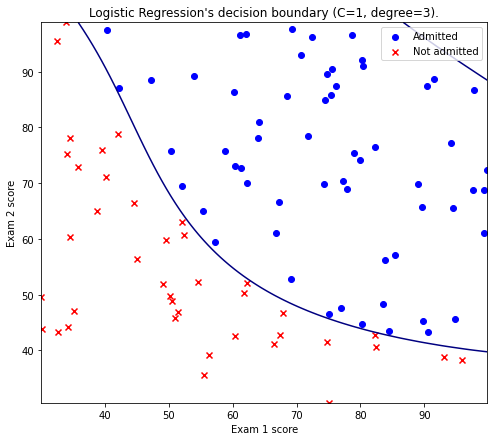

In [36]:
# students with positive admissions
pos = data[data[:,2]==1]

# students with negative admissions
neg = data[data[:,2]==0]

# plot training data
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(pos[:,0], pos[:,1], c='blue', label='Admitted')
ax.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
ax.set_title('Logistic Regression\'s decision boundary (C=1, degree=3).')

## Make data for boundary
# Grid over which we will draw decision boundary
x1_vals = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 100)
x2_vals = np.linspace(np.min(data[:,1]), np.max(data[:,1]), 100)

# initialize J_vals to a matrix of 0's
boundary = np.zeros((len(x1_vals), len(x2_vals)))

# Fill out boundary
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        x = np.array([[x1_vals[i], x2_vals[j]]])
        boundary[j,i] = clf.predict_proba(x) # boundary[j,i] (not [i,j]) other way we will have to transpose boundary
                                            # to meet countour plot requirments
            
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

ax.contour(x1_mesh, x2_mesh, boundary, levels=np.ones(1)*0.5, cmap='jet')

plt.legend();

We have found a very good example of overfitting to training set. Accuracy on training set is 100 % but if we try our model on new data, especially if we try applicant's that get near 100 points from both exams our model would predictm that they would not get admittion. We need to add some constraints to our model to avoid overfitting. We can use stronger regularization or lower polynomial degree for additional features. Let's degree 2 polynomial.

In [37]:
# create classifier object
clf = MyLogisticRegressionModel(C=1, degree=2)

# fit the model
clf.fit(X, y);

<ipython-input-32-3b9a375b8303>:33: RuntimeWarning: divide by zero encountered in log
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + self.C/m*theta2[1:].T@theta2[1:]
<ipython-input-32-3b9a375b8303>:33: RuntimeWarning: invalid value encountered in matmul
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + self.C/m*theta2[1:].T@theta2[1:]
<ipython-input-32-3b9a375b8303>:33: RuntimeWarning: divide by zero encountered in log
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + self.C/m*theta2[1:].T@theta2[1:]
<ipython-input-32-3b9a375b8303>:33: RuntimeWarning: invalid value encountered in matmul
  J = 1/m*(-1 * y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + self.C/m*theta2[1:].T@theta2[1:]


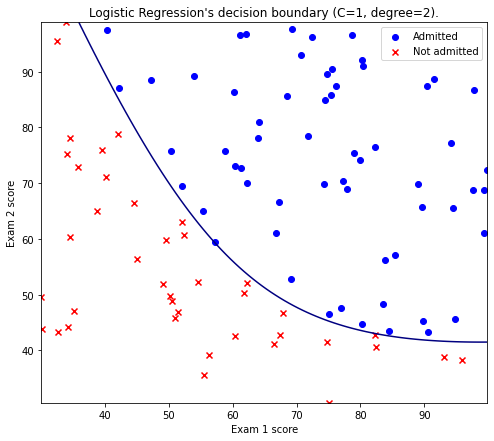

In [38]:
# plot training data
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(pos[:,0], pos[:,1], c='blue', label='Admitted')
ax.scatter(neg[:,0], neg[:,1], c='red', marker='x', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
ax.set_title('Logistic Regression\'s decision boundary (C=1, degree=2).')

## Make data for boundary
# Grid over which we will draw decision boundary
x1_vals = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 100)
x2_vals = np.linspace(np.min(data[:,1]), np.max(data[:,1]), 100)

# initialize J_vals to a matrix of 0's
boundary = np.zeros((len(x1_vals), len(x2_vals)))

# Fill out boundary
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        x = np.array([[x1_vals[i], x2_vals[j]]])
        boundary[j,i] = clf.predict_proba(x) # boundary[j,i] (not [i,j]) other way we will have to transpose boundary
                                            # to meet countour plot requirments
            
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

ax.contour(x1_mesh, x2_mesh, boundary, levels=np.ones(1)*0.5, cmap='jet')

plt.legend();

Looks much better:)